<a href="https://colab.research.google.com/github/singwang-cn/Hajimeteno_pr/blob/master/ex5_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import struct
import random
import numpy as np
import matplotlib.pyplot as plt


# 1st step: anlysing the original binary data files

**The data set used here is from [THE MNIST DATABASE](http://yann.lecun.com/exdb/mnist/)












The function used to load data in the files

In [0]:
def load_image(datafile=''):
  path = '/content/drive/My Drive/Dataset/mnist dataset/'+datafile
  data = open(path, 'rb').read()
  magic_number, num_image, num_row, num_col = struct.unpack_from('>iiii', data, 0)
  offset = 16
  image_list = []
  for i in range(num_image):
    image = np.array(struct.unpack_from('>'+str(num_row*num_col)+'B', data, offset)).reshape(num_row,num_col)
    image_list.append(image)
    offset += int(num_row*num_col)
  return image_list

In [0]:
def load_label(datafile=''):
  path = '/content/drive/My Drive/Dataset/mnist dataset/'+datafile
  data = open(path, 'rb').read()
  magic_number, num_label = struct.unpack_from('>ii', data, 0)
  offset = 8
  label_list = []
  for i in range(num_label):
    label = struct.unpack_from('>B', data, offset)
    label_list.append(label[0])
    offset += 1
  return label_list

The complete data set in arrays

In [0]:
image_train = load_image('train-images.idx3-ubyte')
label_train = load_label('train-labels.idx1-ubyte')
image_test = load_image('t10k-images.idx3-ubyte')
label_test = load_label('t10k-labels.idx1-ubyte')

# 2nd step: Implement of nearest neighbor method

In [0]:
def nearest_neighbor_method(test_image, template_image, template_label):
  distance_from_classes = [0 for i in range(10)]
  class_iterator = 0
  for i in range(len(template_image)):
    class_iterator = template_label[i]
    square_distance = sum(np.square(template_image[i].flatten() - test_image.flatten()))
    if square_distance < distance_from_classes[class_iterator] or distance_from_classes[class_iterator] == 0:
      distance_from_classes[class_iterator] = square_distance
  result = distance_from_classes.index(min(distance_from_classes))
  return result

# 3rd step: Test

minimize the training data set to reduce the time spent by computation

In [0]:
total_data_train = [[image_train[i],label_train[i]] for i in range(len(image_train))]
mini_data_train = random.sample(total_data_train, 6000)
mini_image_train, mini_label_train = [data[0] for data in mini_data_train], [data[1] for data in mini_data_train]
total_data_test = [[image_test[i],label_test[i]] for i in range(len(image_test))]
mini_data_test = random.sample(total_data_test, 1000)
mini_image_test, mini_label_test = [data[0] for data in mini_data_test], [data[1] for data in mini_data_test]

choose a sample to comfirm whether the NN method works

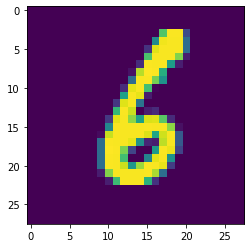

In [45]:
plt.imshow(mini_image_test[555])

In [46]:
nearest_neighbor_method(mini_image_test[555], mini_image_train, mini_label_train)

6

began test processing

In [50]:
correct = 0
for i in range(len(mini_image_test)):
  if nearest_neighbor_method(mini_image_test[i], mini_image_train, mini_label_train) == mini_label_test[i]:
    correct += 1
accuracy = correct/len(mini_image_test)
print("ErrorRate: {:.2%}\nAccutacy: {:.2%}".format(1-accuracy,accuracy))

ErrorRate: 4.90%
Accutacy: 95.10%
